In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def map_labels(labels):
    mapping = {'anger': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'sadness': 5, 'surprise': 6}
    return [mapping[lbl] for lbl in labels]

imsize = (48, 48)

load data and visualize

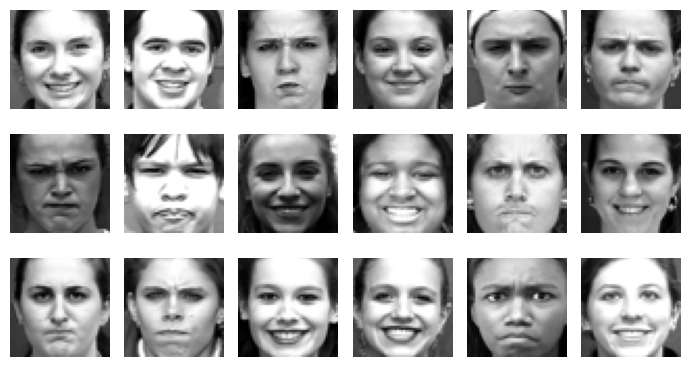

In [2]:
X_train = np.load('dataset/X_train.npy')
y_train = np.load('dataset/y_train.npy')
X_test = np.load('dataset/X_test.npy')
y_test = np.load('dataset/y_test.npy')

fig, axes = plt.subplots(3, 6, figsize=(7, 4))
axes = axes.ravel()
for i in range(3*6):
    im = X_train[i].reshape(imsize)
    axes[i].imshow(im, cmap='gray')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

#### Pricipal Components Analysis 

1) learning the principal components

In [3]:
N = len(X_train)
k = 100 # number of principal components to keep

# 1) learn the principal components.
X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)
B = (X_train - X_mean) / X_std
C = B.T@B / (N-1)
eigenvalues, eigenvectors = np.linalg.eigh(C)
# sort the eigenvectors by eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
all_principal_components = eigenvectors[:, sorted_indices]
# keep only first k principal components
principal_components = all_principal_components[:, :k]

# 2) Transform into new basis.
# B = (X_train - X_mean) / X_std
coefficients = B @ principal_components # latent representation $z$

# 3) Reconstructing back.
B_recon = coefficients @ principal_components.T
X_recon = B_recon * X_std + X_mean

2) Using the learnt principal components on unseen test data.

In [4]:
# 2) Transform into new basis.
B_test = (X_test - X_mean) / X_std
coefficients_test = B_test @ principal_components # latent representation $z$

# 3) Reconstructing X_new back from the new basis.
B_test_recon = coefficients_test @ principal_components.T
X_test_recon = B_test_recon * X_std + X_mean

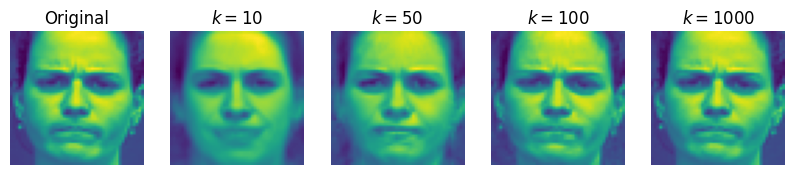

In [12]:
def plot_different_pcs(X, num_pcs):
    fig, axes = plt.subplots(1, len(num_pcs)+1, figsize=(10, 5))
    axes[0].imshow(X.reshape(imsize))
    axes[0].axis('off')
    axes[0].set_title('Original')
    X_new_standardized = (X - X_mean) / X_std
    
    for i, num_pc in enumerate(num_pcs, 1):
        principal_components = all_principal_components[:, :num_pc]
        coefficients = X_new_standardized @ principal_components

        X_recon_standardized = coefficients @ principal_components.T
        X_recon = X_recon_standardized * X_std + X_mean
        
        axes[i].imshow(X_recon.reshape(imsize))
        axes[i].axis('off')
        axes[i].set_title(f'$k={num_pc}$')
    plt.show()

X = X_test[:1]
num_pcs = [10, 50, 100, 1000]
plot_different_pcs(X, num_pcs)

In [53]:
(c==0).shape

(42,)

In [56]:
coefficients_test.shape

(42, 100)

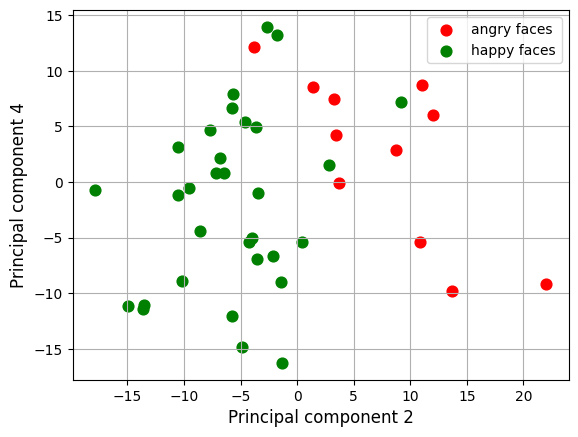

In [66]:
c = np.array(map_labels(y_test))
plt.scatter(coefficients_test[c==0, 3], coefficients_test[c==0, 5], s=60, c='red', label='angry faces') # anger
plt.scatter(coefficients_test[c==4, 3], coefficients_test[c==4, 5], s=60, c='green', label='happy faces') # happy
plt.xlabel('Principal component 2', fontdict={'fontsize': 12})
plt.ylabel('Principal component 4', fontdict={'fontsize': 12})
plt.legend()
plt.grid()
plt.show()